In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [22]:
import datetime as dt
import scipy.stats as stats
from scipy import stats
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [26]:
Measurement=Base.classes.measurement
Station=Base.classes.station

In [27]:
# Save references to each table


In [28]:
# Create our session (link) from Python to the DB
session=Session(engine)
connection=engine.connect()

# Exploratory Climate Analysis

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [30]:
get_last_data=session.query(func.max(Measurement.date))
for d in get_last_date:
    max_date=d[0]
print(max_date)


2017-08-23


In [33]:

# Use Pandas to calcualte the summary statistics for the precipitation data
temp_date=datetime.strptime(max_date, '%Y-%m-%d')-dt.timedelta(days=365)
min_date=temp_date.date()
print(min_date)
print(f'last date found:{max_date}, 1 year before:{min_date}')

2016-08-23
last date found:2017-08-23, 1 year before:2016-08-23


In [44]:
df_precip=pd.read_sql((session.query(Measurement.date,Measurement.prcp,Measurement.station))\
                     .filter(Measurement.date>=min_date)\
                     .filter(Measurement.date<=max_date)\
                     .statement, engine)

# Design a query to show how many stations are available in this dataset?
df_precip=df_precip.set_index('date')
df_precip=df_precip.dropna(how='any')
df_precip=df_precip.sort_values("date")
df_precip.head()


,prcp,station
date,,
2016-08-23,0.00,USC00519397
2016-08-23,0.02,USC00519523
2016-08-23,0.05,USC00514830
2016-08-23,0.70,USC00516128
2016-08-23,0.15,USC00513117


([], <a list of 0 Text xticklabel objects>)

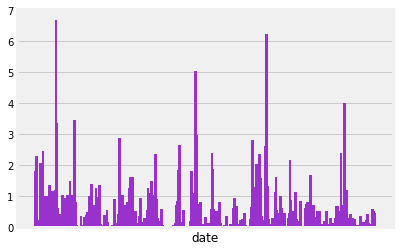

In [40]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
x_axis=df_precip.index
y_axis=df_precip.prcp

plt.bar(x_axis,y_axis, color="darkorchid", width=3)
plt.xlabel('date')
plt.xticks([])

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df_precip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_count=session.query(Station.station).group_by(Station.station).count()
print(f'There are {station_count} stations')


There are 9 stations


In [55]:
session.query(Station.id).count()

9

In [49]:
# Perform a query to retrieve the date and precipitation scores

precip=session.query(Measurement.date, func.avg(Measurement.prcp))\
        .filter(Measurement.date>=min_date)\
        .filter(Measurement.date<=max_date)\
        .group_by(Measurement.date).all()
precip




[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [54]:
precip_df=pd.DataFrame(precip, columns=['date',"precip"])
precip_df.set_index("date", inplace=True)
precip_df.sort_values(by=['date'])
precip_df.head()

,precip
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


In [58]:
active_stations=session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
print(f'the moat active station: {active_stations[0][0]}')
most_active_station=active_stations[0][0]
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station==most_active_station).all()


the moat active station: USC00519281


[(54.0, 85.0, 71.66378066378067)]

In [65]:
#session.query(func.max(Measurement.tobs))
temp_data=session.query(Measurement.station, Measurement.tobs)\
.filter(Measurement.station==most_active_station)\
.filter(Measurement.date>=min_date).all()
#temp_data
tobs_df=pd.DataFrame(temp_data)
tobs_df.set_index("station",inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<function matplotlib.pyplot.show(*args, **kw)>

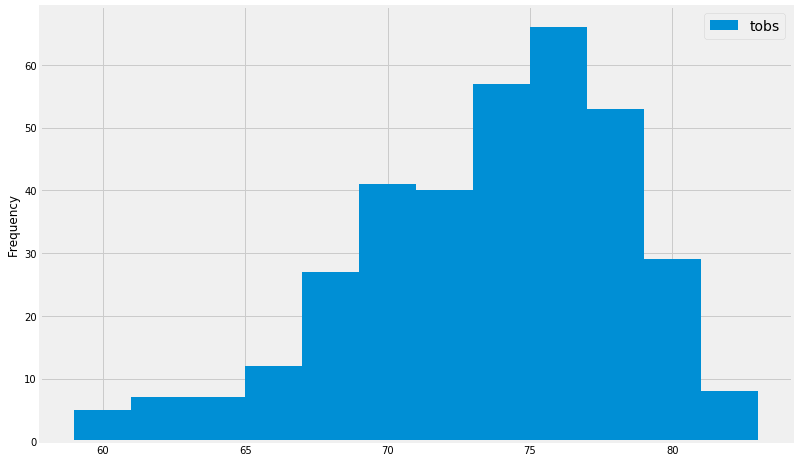

In [66]:
tobs_df.plot.hist(by='station',bins=12,figsize=(12,8))
plt.legend(bbox_to_anchor=(1,1),fontsize=14)
plt.savefig("Images/station_temp.png")
plt.show

## Bonus Challenge Assignment

In [68]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
